In [ ]:
!pip install datascience

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.5 MB/s eta 0:00:00


In [ ]:
from datascience import *
!pip install matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.font_manager as fm

# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-11-19 14:17:31--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.98.102, 108.177.98.139, 108.177.98.113, ...
Connecting to drive.google.com (drive.google.com)|108.177.98.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kpr0gulo0jn7s7v7clmdmeeligecdvcq/1700403450000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=4738d761-e333-4a2a-831b-cdbc623669de [following]
--2023-11-19 14:17:32--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kpr0gulo0jn7s7v7clmdmeeligecdvcq/1700403450000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=4738d761-e333-4a2a-831b-cdbc623669de
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.203.132, 2607:f8b0:400e:c05::84
Connecting to doc-0

<ipython-input-3-5e06889437aa>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = filtered_data[~data['分發結果名稱'].str.contains('人工退選')]
<ipython-input-3-5e06889437aa>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = filtered_data[~data['學制屬性名稱'].isin(['碩士', '博士', '碩博同修'])]
<ipython-input-3-5e06889437aa>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = filtered_data[~data['課程屬性名稱'].str.contains('必修')]


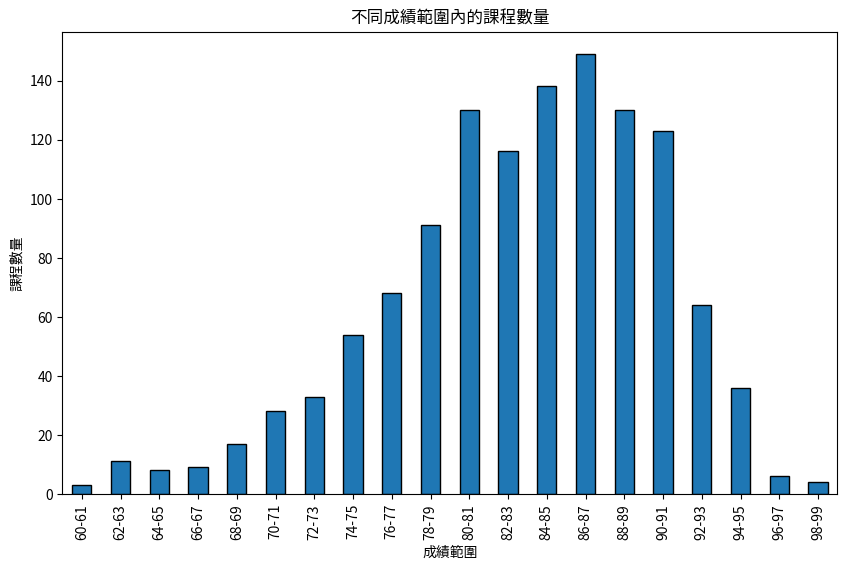

In [ ]:
from datascience import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.font_manager as fm

# 指定CSV檔案的路徑
csv
file_path = "https://raw.githubusercontent.com/JackyYang27/data-science-and-big-data/main/dataset/112-0004_%E6%A0%A1%E5%8B%99%E6%8B%8B%E8%BD%89%E8%B3%87%E6%96%99_%E5%AD%B8%E7%94%9F%E9%81%B8%E8%AA%B2%E6%88%90%E7%B8%BE%E8%B3%87%E6%96%99_1021(01).csv"

# 讀取CSV檔案
data = pd.read_csv(file_path)

# 篩選出需要的列：學號、學分數、課程名稱和成績
filtered_data = data[['學號', '學分數', '課程名稱', '成績','課程流水號']]

# 用'NaN'替換NaN值
data.fillna('NaN', inplace=True)

# 刪除登陸屬性名稱為「停修」的行
filtered_data = filtered_data[~data['登錄屬性名稱'].str.contains('停修')]

# 刪除分發結果名稱為「人工退選」的行
filtered_data = filtered_data[~data['分發結果名稱'].str.contains('人工退選')]

# 刪除學制屬性名稱為「碩士」、「博士」或「碩博同修」的行
filtered_data = filtered_data[~data['學制屬性名稱'].isin(['碩士', '博士', '碩博同修'])]

# 刪除課程屬性名稱為「必修」的行
filtered_data = filtered_data[~data['課程屬性名稱'].str.contains('必修')]

courses_to_remove = ['土木工程實務', '全民國防教育軍事訓練-國防政策', '音樂鑑賞導引', '全民國防教育軍事訓練-國防政策']

# 刪除指定課程名稱的行
filtered_data = filtered_data[~filtered_data['課程名稱'].isin(courses_to_remove)]

filtered_data['成績'] = pd.to_numeric(filtered_data['成績'], errors='coerce')

# 使用 groupby 根據課程流水號分組，並計算每組的平均成績和學生數量
grouped = filtered_data.groupby('課程流水號')
average_scores = grouped['成績'].mean()
student_counts = grouped['學號'].count()

# 獲取每個流水號對應的課程名稱
course_names = filtered_data.drop_duplicates(subset='課程流水號').set_index('課程流水號')['課程名稱']

# 合併課程名稱、平均成績和學生數量
result = pd.concat([course_names, average_scores, student_counts], axis=1)
result.columns = ['課程名稱', '平均成績', '選課人數']

# 印出結果
'''
for index, row in result.iterrows():
    print(f"課程名稱: {row['課程名稱']}, 平均成績: {row['平均成績']:.2f}, 選課人數: {row['選課人數']}")
'''
# 使用 groupby 根據課程流水號分組，計算每組的平均成績
average_scores = filtered_data.groupby('課程流水號')['成績'].mean()

# 定義成績範圍並計算每個範圍內的課程數
bins = np.arange(60, 101, 2)  # 從 60 到 100，每 5 分一個區間
labels = [f'{i}-{i+1}' for i in range(60, 100, 2)]
average_scores['Range'] = pd.cut(average_scores, bins=bins, labels=labels, right=False)
course_count = average_scores['Range'].value_counts().sort_index()

# 繪製長條圖
plt.figure(figsize=(10, 6))
course_count.plot(kind='bar')

# 設置 X 軸和 Y 軸標籤
plt.xlabel('成績範圍')
plt.ylabel('課程數量')

# 設置圖表標題
plt.title('不同成績範圍內的課程數量')

# 顯示圖表
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取第一份CSV文件
url_1 = "https://raw.githubusercontent.com/JackyYang27/data-science-and-big-data/main/dataset/112-0004_%E6%A0%A1%E5%8B%99%E6%8B%8B%E8%BD%89%E8%B3%87%E6%96%99_%E5%AD%B8%E7%94%9F%E5%AD%B8%E6%9C%9F%E5%B9%B3%E5%9D%87%E6%88%90%E7%B8%BE_1021(01).csv"
df_1 = pd.read_csv(url_1)

# 全校
departments = [
    '文學院學士班', '中國文學系', '英美語文學系', '法國語文學系',
    '理學院學士班', '物理學系', '數學系', '化學學系', '光電科學與工程學系',
    '工學院學士班', '化學工程與材料工程學系', '土木工程學系', '機械工程學系',
    '企業管理學系', '資訊管理學系', '財務金融學系', '經濟學系',
    '資訊電機學院學士班', '電機工程學系', '資訊工程學系', '通訊工程學系',
    '地球科學學院學士班', '地球科學學系', '大氣科學學系', '太空科學與工程學系',
    '客家語文暨社會科學學系', '生命科學系', '生醫科學與工程學系'
]

df_filtered_1 = df_1[df_1['系所名稱'].isin(departments)]
df_filtered_1['學期-班一般人數'] = pd.to_numeric(df_filtered_1['學期-班一般人數'], errors='coerce')
df_filtered_1 = df_filtered_1.dropna(subset=['學期-班一般人數', '學期-班一般名次'])

# 找出前5%的學生學號和剩餘95%的學生學號
top_students = pd.DataFrame()
remaining_students = pd.DataFrame()
for (dept, year_class), group in df_filtered_1.groupby(['系所名稱', '年級班別']):
    top_n = max(int(round(len(group) * 0.05)), 1)
    top_students_in_group = group.nsmallest(top_n, '學期-班一般名次')
    top_students = pd.concat([top_students, top_students_in_group], ignore_index=True)

top_student_ids = top_students['學號'].tolist()

top_students_data = filtered_data[filtered_data['學號'].isin(top_student_ids)]

# 分組並計算每門課程的選課人數
course_selection_counts = top_students_data.groupby(['課程名稱', '課程流水號']).size().reset_index(name='選課人數')

merged_data = pd.merge(course_selection_counts, average_scores, on='課程流水號')


# 顯示結果
print(merged_data)


<ipython-input-4-0703491f08e8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_1['學期-班一般人數'] = pd.to_numeric(df_filtered_1['學期-班一般人數'], errors='coerce')


             課程名稱  課程流水號  選課人數         成績
0       ERP企業流程管理  41045     4  84.207317
1    ERP與資料倉儲專題研究  41044     3  79.911111
2       ERP財務會計模組  41032     2  95.391304
3     Java 程式設計進階  43028     4     72.875
4       Linux作業系統  52052     2  93.714286
..            ...    ...   ...        ...
389      高等應用數學 Ⅱ  61057     1       89.5
390        高等會計學I  48016     3  84.351351
391         高等演算法  52049     1  75.366667
392        高等積光專論  26045     1       89.0
393        高能物理導論  22051     3       77.0

[394 rows x 4 columns]


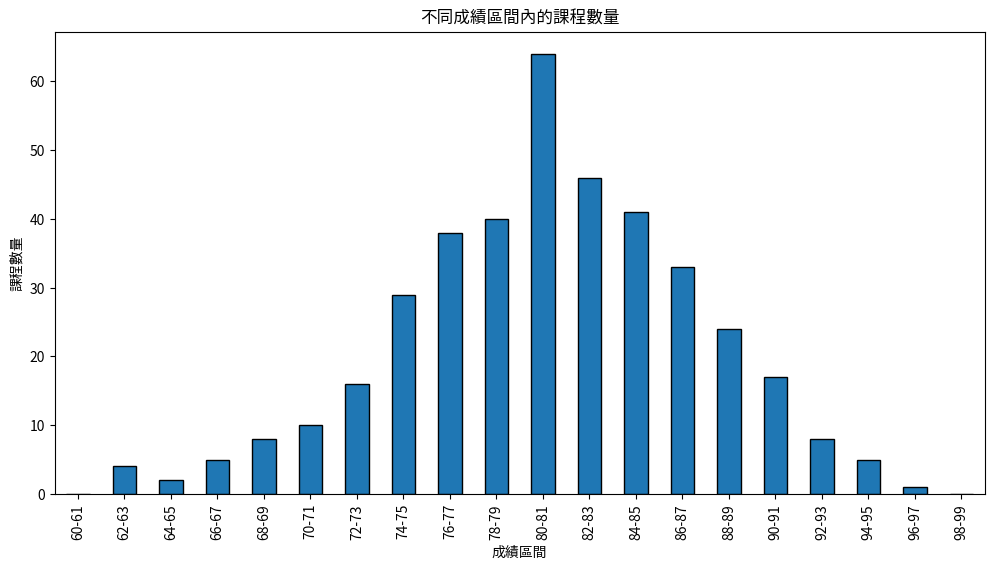

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 定義成績範圍並計算每個範圍內的課程數
bins = np.arange(60, 101, 2)  # 從 60 到 100，每 2 分一個區間
labels = [f'{i}-{i+1}' for i in range(60, 100, 2)]

# 使用 cut 函數將課程平均成績分配到區間中
merged_data['成績區間'] = pd.cut(merged_data['成績'], bins=bins, labels=labels, right=False)

# 計算每個成績區間的課程數量
course_counts = merged_data['成績區間'].value_counts().sort_index()

# 繪製長條圖
plt.figure(figsize=(12, 6))
course_counts.plot(kind='bar')

# 設置 X 軸和 Y 軸標籤
plt.xlabel('成績區間')
plt.ylabel('課程數量')

# 設置圖表標題
plt.title('不同成績區間內的課程數量')

# 顯示圖表
plt.show()


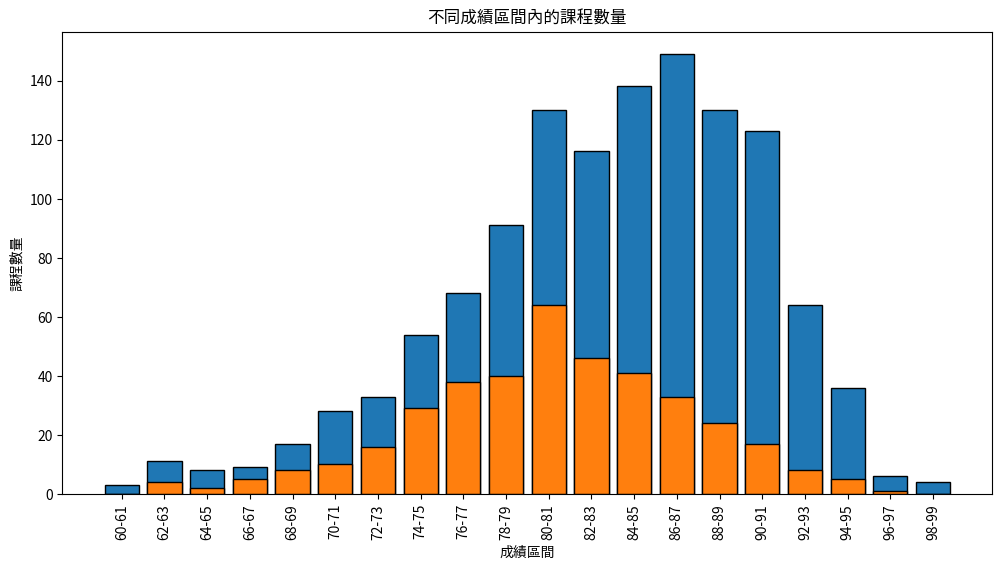

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 定義成績範圍並計算每個範圍內的課程數
bins = np.arange(60, 101, 2)  # 從 60 到 100，每 2 分一個區間
labels = [f'{i}-{i+1}' for i in range(60, 100, 2)]

# 使用 cut 函數將課程平均成績分配到區間中
merged_data['成績區間'] = pd.cut(merged_data['成績'], bins=bins, labels=labels, right=False)

# 計算每個成績區間的課程數量
course_counts = merged_data['成績區間'].value_counts().sort_index()

# 獲取 X 軸標籤（區間）和 Y 軸值（課程數量）
x_label_1 = course_count.index
y_label_1 = course_count.values
x_label_2 = course_counts.index
y_label_2 = course_counts.values

# 繪製長條圖
plt.figure(figsize=(12, 6))
plt.bar(x_label_1, y_label_1, width=0.8)
plt.bar(x_label_2, y_label_2, width=0.8)

# 設置 X 軸和 Y 軸標籤
plt.xlabel('成績區間')
plt.ylabel('課程數量')

# 設置圖表標題
plt.title('不同成績區間內的課程數量')

# 設置 X 軸標籤旋轉，以便閱讀
plt.xticks(rotation=90)

# 顯示圖表
plt.show()
